In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
scaled_data = pd.read_csv("../data/processed/scaled_data.csv", index_col=0)
scaled_data.head()

,Open,High,Low,Close,MA20,MA50,Rolling_STD,Daily_Return,Volatility,Upper_Band,...,%B,RSI,Close_Open_Diff,High_Low_Diff,High_Volatility,Volatility_Price_Ratio,Momentum,Rolling_Return_5d,MA20_MA50_Interaction,Close_Volatility_Interaction
date,,,,,,,,,,,,,,,,,,,,,
2014-11-23,2.191889,2.257424,2.252358,2.192606,2.266625,1.613936,-0.412957,0.954561,2.01357,2.215342,...,-0.328197,0.488581,0.297949,-0.160033,2.810876,-0.556635,0.550805,1.092093,2.015158,2.658475
2014-11-24,2.308272,2.330381,2.312030,2.302185,2.266625,1.613936,-0.412957,0.954561,2.01357,2.215342,...,0.320088,0.488581,-1.410482,0.022916,2.810876,-0.563156,0.550805,1.092093,2.015158,2.689204
2014-11-25,2.389062,2.416758,2.384088,2.391431,2.266625,1.613936,-0.412957,0.775757,2.01357,2.215342,...,0.848072,0.488581,0.725057,0.219317,2.810876,-0.568423,0.550805,1.092093,2.015158,2.714231
2014-11-26,2.439155,2.409953,2.424995,2.439066,2.266625,1.613936,-0.412957,0.417363,2.01357,2.215342,...,1.129887,0.488581,0.108123,-0.464050,2.810876,-0.571217,0.550805,1.092093,2.015158,2.727590
2014-11-27,2.350267,2.350416,2.359130,2.356410,2.266625,1.613936,-0.412957,-0.694317,2.01357,2.215342,...,0.640888,0.488581,1.674186,-0.367195,2.810876,-0.566361,0.550805,1.092093,2.015158,2.704410


# Build Random Forrest model
`TODO` explain why I am doing this

In [3]:
# Define features and target
X = scaled_data.drop(columns=['Close'])
y = scaled_data['Close']

In [4]:
#fit model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [6]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                         Feature    Importance
0                           Open  9.907432e-01
1                           High  5.894964e-03
2                            Low  3.282102e-03
11                    Lag1_Close  1.131499e-05
30  Close_Volatility_Interaction  7.114014e-06
21                            %B  6.289286e-06
28             Rolling_Return_5d  5.460998e-06
12                    Lag2_Close  4.408248e-06
27                      Momentum  4.220977e-06
4                           MA50  4.037502e-06
8                     Upper_Band  3.908602e-06
9                     Lower_Band  3.256044e-06
6                   Daily_Return  2.858588e-06
7                     Volatility  2.692738e-06
16                Rate_of_Change  2.685299e-06
29         MA20_MA50_Interaction  2.589000e-06
24                 High_Low_Diff  2.331842e-06
17                   Daily_Range  2.309185e-06
23               Close_Open_Diff  2.283021e-06
18                  Weekly_Range  2.282591e-06
22           

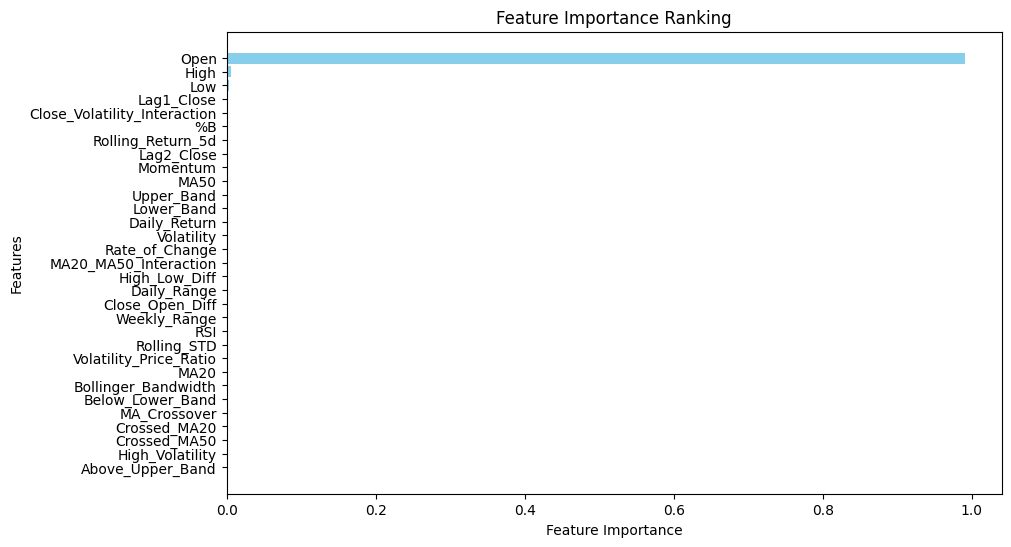

In [7]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()